In [1]:
%load_ext autoreload
%load_ext watermark

In [2]:
%autoreload 2

In [3]:
%watermark -ntz -p matplotlib,numpy,pandas

Mon Aug 01 2022 00:32:44 India Standard Time 

matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4


In [4]:
from pathlib import Path

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

---
# Exercise 3: Visualise Weather Data
You have been provided data on rainfall and temperature
in Cumbria
during 2019.
Before combining this data with traffic data,
you should first understand what the weather data looks like.
At the end of this exercise,
you should understand how rainfall and temperature vary across months
and how the weather patterns relate to one another.
You should be able to form some ideas
about which statistics
should be extracted from the data
for use by a predictive model.

## Learning objectives
Objectives which _may_ be met during this exercise.

_Refer to the [exercise document](../references/exercise_background.md#development-objectives) for more information on objectives_

- I can produce simple, static plots to identify key features (_DATA 1_)
- I can identify bad data and clean them (_DATA 1_)

---
## Step 1: Load the data

**Tasks:**
- Load the parsed weather data we created in `Exercise 1`

In [5]:
data_path = Path.cwd().resolve().parent / 'analysis' / "data" / "interim" / 'weather_data_i.csv'

In [6]:
df = pd.read_csv(data_path)

---
## Step 2: Group data by month
Daily variations in weather might be too fine-grained at the moment
for you to draw conclusions about the impact on traffic.
You should first group the data by month
to discover broad trends in the data.

**Tasks:**
- Group the data by month to find the average monthly rainfall and temperature
    - Which month has the greatest average rainfall and temperature?
    - Are there any abnormalities?
- **\[Extension]** Why should we take the average rather than the total?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    365 non-null    object 
 1   Rainfall (mm)           365 non-null    float64
 2   MaxApparentTemp (degC)  365 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB


In [8]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].apply(lambda d: d.month)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    365 non-null    datetime64[ns]
 1   Rainfall (mm)           365 non-null    float64       
 2   MaxApparentTemp (degC)  365 non-null    float64       
 3   Month                   365 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 11.5 KB


In [10]:
df

,Date,Rainfall (mm),MaxApparentTemp (degC),Month
0,2019-01-01,0.0,7.7,1
1,2019-01-02,0.0,0.4,1
2,2019-01-03,0.0,1.0,1
3,2019-01-04,0.0,2.8,1
4,2019-01-05,0.0,3.4,1
...,...,...,...,...
360,2019-12-27,0.6,5.8,12
361,2019-12-28,0.3,6.8,12
362,2019-12-29,0.0,6.3,12
363,2019-12-30,0.0,7.3,12


In [12]:
df.groupby('Month').agg({'Rainfall (mm)': 'mean', 'MaxApparentTemp (degC)':'mean'})

,Rainfall (mm),MaxApparentTemp (degC)
Month,,
1,0.861290,2.167742
2,3.382143,5.610714
3,5.800000,5.503226
4,1.403333,9.740000
5,0.764516,12.432258
6,3.253333,15.690000
7,3.280645,20.616129
8,4.774194,18.270968
9,1.976667,14.840000


In [21]:
monthly_df = df.groupby('Month').agg({'Rainfall (mm)': 'mean', 'MaxApparentTemp (degC)':'mean'})
#monthly_df.rename(columns = {'Rainfall (mm)':'AvgRain', 'MaxApparentTemp (degC)':'AvgTemp'}, inplace =True)

In [22]:
monthly_df['Rainfall (mm)'] = np.round(monthly_df['Rainfall (mm)'],3)
monthly_df['MaxApparentTemp (degC)'] = np.round(monthly_df['MaxApparentTemp (degC)'],3)
monthly_df

,Rainfall (mm),MaxApparentTemp (degC)
Month,,
1,0.861,2.168
2,3.382,5.611
3,5.800,5.503
4,1.403,9.740
5,0.765,12.432
6,3.253,15.690
7,3.281,20.616
8,4.774,18.271
9,1.977,14.840


---
## Step 3: Plot monthly data

**Tasks:**
- Scatter plot monthly temperature and rainfall on the same chart to visualise trends
- Design the chart so the information is clear and well-represented
- What trends can you see in the monthly weather? Based on your own intuition, if weather _does_ have a strong impact on traffic, how would you expect traffic to vary with month?
- **\[Extension]** Is a scatter plot the best representation of this data? What about a line chart? A bar chart?
- **\[Extension]** Produce this chart in another plotting library, such as Altair. What are the drawbacks and advantages of making this plot in matplotlib?

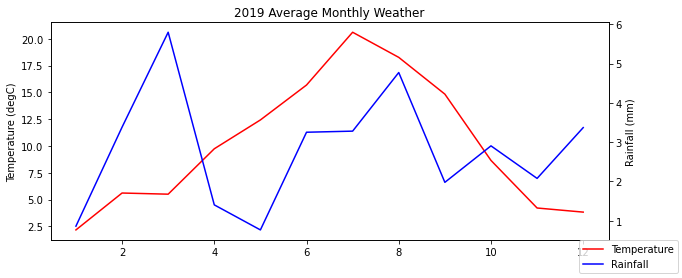

In [43]:
fig, ax1 = plt.subplots(figsize=(10,4))
plt.title("2019 Average Monthly Weather")

# Plot temperature
# TODO make the two sets of data distinct
ax1.set_ylabel("Temperature (degC)")
p1 = ax1.plot(monthly_df.index, monthly_df["MaxApparentTemp (degC)"], "r", label = 'Temperature')

# TODO Plot rainfall on the same chart
ax2 = ax1.twinx()
ax2.set_ylabel("Rainfall (mm)")
p2 = ax2.plot(monthly_df.index, monthly_df["Rainfall (mm)"], "b", label = 'Rainfall')

ax2.set_xlabel('Month Number')


fig.legend(loc=4)
plt.show()

---
## Step 4: Visualise weekly trends
While the data exhibits some strong monthly trends,
there might be some nuance we are missing on the weekly level.

**Tasks:**
- Repeat steps `2` and `3` for weekly data
- Was grouping by month a useful visualisation? Do you think expected weekly or monthly average weather would be useful datapoint for a model?

In [34]:
df['Week'] = df['Date'].dt.week

In [37]:
weekly_df = df.groupby('Week').agg({'Rainfall (mm)': 'mean', 'MaxApparentTemp (degC)':'mean'})
weekly_df['Rainfall (mm)'] = np.round(weekly_df['Rainfall (mm)'],3)
weekly_df['MaxApparentTemp (degC)'] = np.round(weekly_df['MaxApparentTemp (degC)'],3)

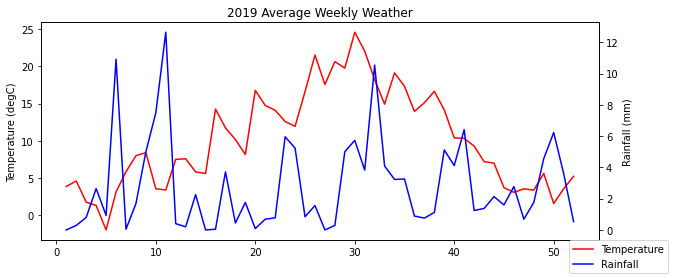

In [38]:
fig, ax1 = plt.subplots(figsize=(10,4))
plt.title("2019 Average Weekly Weather")

# Plot temperature
# TODO make the two sets of data distinct
ax1.set_ylabel("Temperature (degC)")
p1 = ax1.plot(weekly_df.index, weekly_df["MaxApparentTemp (degC)"], "r", label = 'Temperature')

# TODO Plot rainfall on the same chart
ax2 = ax1.twinx()
ax2.set_ylabel("Rainfall (mm)")
p2 = ax2.plot(weekly_df.index, weekly_df["Rainfall (mm)"], "b", label = 'Rainfall')


fig.legend(loc=4)
plt.show()

---
## Step 5: Visualise daily weather
Aggregated data will not be sufficient to predict _daily_ traffic
in practice
because weather can vary significantly day-to-day.

**Tasks**:
- Plot the daily rainfall and temperature on separate charts
- Are there any outliers we should remove?
- Which months have the most variance in weather? How will this impact a model and how could it be accounted for?

In [50]:
df.head()

,Date,Rainfall (mm),MaxApparentTemp (degC),Month,Week
0,2019-01-01,0.0,7.7,1,1
1,2019-01-02,0.0,0.4,1,1
2,2019-01-03,0.0,1.0,1,1
3,2019-01-04,0.0,2.8,1,1
4,2019-01-05,0.0,3.4,1,1


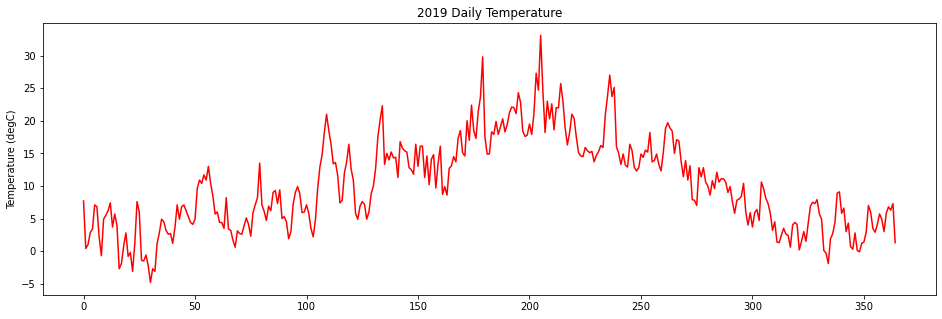

In [53]:
plt.figure(figsize = (16,5))
plt.title("2019 Daily Temperature")
plt.ylabel("Temperature (degC)")
plt.plot(df.index, df["MaxApparentTemp (degC)"], "r", label = 'Temperature')

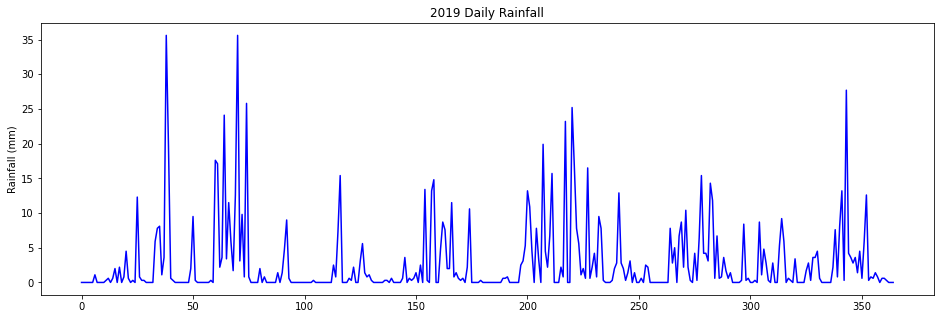

In [55]:
plt.figure(figsize = (16,5))
plt.title("2019 Daily Rainfall")
plt.ylabel("Rainfall (mm)")
plt.plot(df.index, df["Rainfall (mm)"], "b")

---
## **\[Extension]** Step 6: Automate aggregation process

**Tasks:**
- Create functions in `src/traffic-exercise/` which aggregate the data by month or week
- Add a parameter to the function so a user can decide which level of aggregation they want
- Save the aggregated data as new files in `data/interim/`

In [56]:
monthly_df.to_csv(Path.cwd().resolve().parent /'analysis'/ "data" / "interim" / 'monthly_weather_data.csv', index = False)
weekly_df.to_csv(Path.cwd().resolve().parent /'analysis'/ "data" / "interim" / 'weekly_weather_data.csv', index = False)

In [ ]:
def data_aggregator(df, col1 = 'Rainfall (mm)', col2 = 'MaxApparentTemp (degC)', aggregation_type) :
    
    df["Date"] = pd.to_datetime(df["Date"])
    df["Month"] = df["Date"].apply(lambda d: d.month)
    df['Week'] = df['Date'].dt.week
    
    if aggregation_type == 'Monthly':
        monthly_df = df.groupby('Month').agg({col1 : 'mean', col2:'mean'})
        monthly_df[col1] = np.round(monthly_df[col1],3)
        monthly_df[col2] = np.round(monthly_df[col2],3)
        return monthly_df
    
    elif aggregation_type == 'Weekly' :
        weekly_df = df.groupby('Week').agg({col1 : 'mean', col2:'mean'})
        weekly_df[col1] = np.round(weekly_df[col1],3)
        weekly_df[col2] = np.round(weekly_df[col2],3)
        return weekly_df
    
    else :
        return None 
        

        

---
# Review
After this exercise:
- [ ] I can produce simple, static plots to identify key features (_DATA 1_)
- [ ] I can identify bad data and clean them (_DATA 1_)